# DA_HW_3 Support Vector Machine and Decision Trees

# Due on 5/10 23:59 pm

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import random
from sklearn import svm
from sklearn import tree
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings('ignore')

## We will use the same affair dataset from HW2, but will skip the EDA phrase we have done enough of it

#### Everything removing outliers, create dummies variabes had been done for you

In [2]:
# Remember the affair data set from HW3, we will use that dataset again
# but we will directly load it from the API
orig_df = pd.read_csv("affairs2.csv")
# Set up our target class label
orig_df['had_affair'] = orig_df['affairs'].apply(lambda x: 1 if x != 0 else 0)
orig_df = orig_df.drop('affairs',axis=1)
# remove NA
orig_df.dropna(inplace=True)
# create dummies variable for occupation
occ = pd.get_dummies(orig_df['occupation'],drop_first=True)
# we include rate_marriage feature as well. In HW3, we did not include that variable
features = ['rate_marriage','age','yrs_married','children','religious','educ', 'had_affair']
df = orig_df
df = pd.concat([orig_df[features], occ], axis=1)
df.head()

rate_marriage   age  yrs_married  children  religious  educ  had_affair  \
0            3.0  32.0          9.0       3.0        3.0  17.0           1   
1            3.0  27.0         13.0       3.0        1.0  14.0           1   
2            4.0  22.0          2.5       0.0        1.0  16.0           1   
3            4.0  37.0         16.5       4.0        3.0  16.0           1   
4            5.0  27.0          9.0       1.0        1.0  14.0           1   

   occ2  occ3  occ4  occ5  occ6  
0     1     0     0     0     0  
1     0     1     0     0     0  
2     0     1     0     0     0  
3     0     0     0     1     0  
4     0     1     0     0     0

In [3]:
# make sure there is no missing values
df.isnull().sum()

rate_marriage    0
age              0
yrs_married      0
children         0
religious        0
educ             0
had_affair       0
occ2             0
occ3             0
occ4             0
occ5             0
occ6             0
dtype: int64

### Now we are ready to build models

### Question 1: Build a classification model using SVC using linear kernel without specifying the C-parameter

In [4]:
X = df[['rate_marriage','educ','occ2','occ3','occ4','occ5','occ6']].to_numpy()
Y = df['had_affair'].to_numpy()

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [6]:
svc = svm.SVC(kernel='linear')
svc.fit(X_train, Y_train)

SVC(kernel='linear')

In [7]:
Y_pred = svc.predict(X_test)
confusion_matrix(Y_test, Y_pred)

array([[849,  36],
       [313,  76]], dtype=int64)

In [8]:
print(classification_report(Y_test,Y_pred))
print(model.score(X_test, Y_test))

              precision    recall  f1-score   support

           0       0.73      0.96      0.83       885
           1       0.68      0.20      0.30       389

    accuracy                           0.73      1274
   macro avg       0.70      0.58      0.57      1274
weighted avg       0.71      0.73      0.67      1274



In [9]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
print('R-squared:', metrics.r2_score(Y_test, Y_pred))

Mean Absolute Error: 0.2739403453689168
Mean Squared Error: 0.2739403453689168
Root Mean Squared Error: 0.5233931078729608
R-squared: -0.29152251898973214


<AxesSubplot:xlabel='trial'>

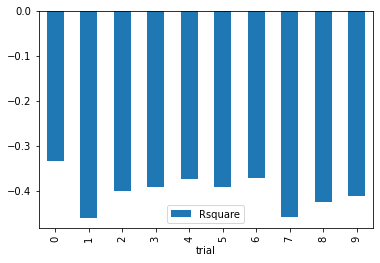

In [10]:
rsquare = []
for i in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = random.randint(1,1000))
    model = svm.SVC()
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    rsquare.append(metrics.r2_score(Y_test, Y_pred))
    
rdf = pd.DataFrame( {'trial': range(10), 'Rsquare': rsquare})
rdf.plot.bar(x='trial', y='Rsquare')

### Question 2. Now try different value of C-parameter and rerun your model

### Large c

In [11]:
svc = svm.SVC(kernel='linear', C=2**5)
svc.fit(X_train, Y_train)

SVC(C=32, kernel='linear')

In [12]:
Y_pred = svc.predict(X_test)
confusion_matrix(Y_test, Y_pred)

array([[813,  42],
       [339,  80]], dtype=int64)

In [13]:
print(classification_report(Y_test,Y_pred))
print(model.score(X_test, Y_test))

              precision    recall  f1-score   support

           0       0.71      0.95      0.81       855
           1       0.66      0.19      0.30       419

    accuracy                           0.70      1274
   macro avg       0.68      0.57      0.55      1274
weighted avg       0.69      0.70      0.64      1274



In [20]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
print('R-squared:', metrics.r2_score(Y_test, Y_pred))

Mean Absolute Error: 0.3069073783359498
Mean Squared Error: 0.3069073783359498
Root Mean Squared Error: 0.5539922186601087
R-squared: -0.38879781420765025


<AxesSubplot:xlabel='trial'>

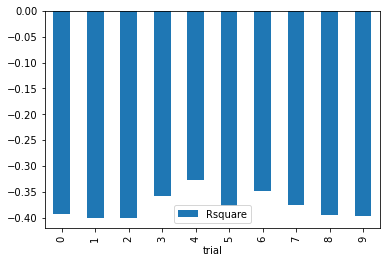

In [21]:
rsquare = []
for i in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = random.randint(1,1000))
    model = svm.SVC()
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    rsquare.append(metrics.r2_score(Y_test, Y_pred))
    
rdf = pd.DataFrame( {'trial': range(10), 'Rsquare': rsquare})
rdf.plot.bar(x='trial', y='Rsquare')

### Small C

In [14]:
svc = svm.SVC(kernel='linear', C=2**-5)
svc.fit(X_train, Y_train)

SVC(C=0.03125, kernel='linear')

In [15]:
Y_pred = svc.predict(X_test)
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test,Y_pred))

[[813  42]
 [338  81]]
              precision    recall  f1-score   support

           0       0.71      0.95      0.81       855
           1       0.66      0.19      0.30       419

    accuracy                           0.70      1274
   macro avg       0.68      0.57      0.55      1274
weighted avg       0.69      0.70      0.64      1274



In [16]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
print('R-squared:', metrics.r2_score(Y_test, Y_pred))

Mean Absolute Error: 0.29827315541601257
Mean Squared Error: 0.29827315541601257
Root Mean Squared Error: 0.5461438962544694
R-squared: -0.3513656854945637


<AxesSubplot:xlabel='trial'>

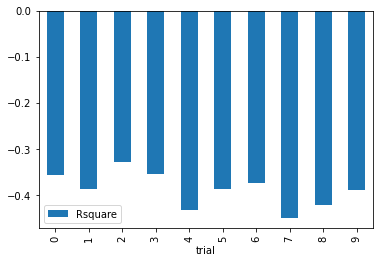

In [17]:
rsquare = []
for i in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = random.randint(1,1000))
    model = svm.SVC()
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    rsquare.append(metrics.r2_score(Y_test, Y_pred))
    
rdf = pd.DataFrame( {'trial': range(10), 'Rsquare': rsquare})
rdf.plot.bar(x='trial', y='Rsquare')

### Question 3. Now use rbf as your kernel along with different value for Gamma and C

Type your answer and code here

In [23]:
gammas = [2**5, 2**-5]
c_s = [10, 100, 1000]

In [32]:
for g in gammas:
    for c in c_s:
        svc = svm.SVC(kernel='rbf', probability=True, C=c, gamma=g)
        svc.fit(X_train, Y_train)
        Y_pred = svc.predict(X_test)
        model.score(X_test, Y_test)
        print('---------------------------------------')
        print('c: ' + str(c) + '\t' + 'gamma: ' +str(g))
        print()
        model.score(X_test, Y_test)
        print(confusion_matrix(Y_test, Y_pred))
        print(classification_report(Y_test,Y_pred))
        print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))  
        print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))  
        print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
        print('R-squared:', metrics.r2_score(Y_test, Y_pred))
        rsquare = []

---------------------------------------
c: 10	gamma: 32

[[736 129]
 [262 147]]
              precision    recall  f1-score   support

           0       0.74      0.85      0.79       865
           1       0.53      0.36      0.43       409

    accuracy                           0.69      1274
   macro avg       0.64      0.61      0.61      1274
weighted avg       0.67      0.69      0.67      1274

Mean Absolute Error: 0.3069073783359498
Mean Squared Error: 0.3069073783359498
Root Mean Squared Error: 0.5539922186601087
R-squared: -0.40801334143618284
---------------------------------------
c: 100	gamma: 32

[[736 129]
 [262 147]]
              precision    recall  f1-score   support

           0       0.74      0.85      0.79       865
           1       0.53      0.36      0.43       409

    accuracy                           0.69      1274
   macro avg       0.64      0.61      0.61      1274
weighted avg       0.67      0.69      0.67      1274

Mean Absolute Error: 0.3069073

### Question 4. So out of all the models you try in Question 2 and 3, what is the best choice for the kernel, C and gamma parameters? Comment on the effect of using different C and Gamma parameters

Type your answer and code here

# Now we will try to fit the same dataset with Decision Trees

### Question 5. Build a Decision Tree Classifier using default parameter

Type your code here

In [39]:
model = DecisionTreeClassifier()
model.fit(X_train,Y_train)

DecisionTreeClassifier()

In [40]:
predictions = model.predict(X_test)
print(confusion_matrix(Y_test,predictions))
print(classification_report(Y_test,predictions))
print(accuracy_score(Y_test, predictions))

[[736 129]
 [261 148]]
              precision    recall  f1-score   support

           0       0.74      0.85      0.79       865
           1       0.53      0.36      0.43       409

    accuracy                           0.69      1274
   macro avg       0.64      0.61      0.61      1274
weighted avg       0.67      0.69      0.68      1274

0.6938775510204082


[Text(192.74370377218938, 209.07692307692307, 'X[0] <= 3.5\ngini = 0.437\nsamples = 5092\nvalue = [3448, 1644]'),
 Text(116.66616124260356, 192.35076923076923, 'X[0] <= 2.5\ngini = 0.483\nsamples = 1136\nvalue = [463, 673]'),
 Text(74.41375739644971, 175.62461538461537, 'X[5] <= 0.5\ngini = 0.445\nsamples = 350\nvalue = [117, 233]'),
 Text(51.75532544378699, 158.89846153846153, 'X[2] <= 0.5\ngini = 0.457\nsamples = 311\nvalue = [110, 201]'),
 Text(29.71597633136095, 142.1723076923077, 'X[0] <= 1.5\ngini = 0.444\nsamples = 252\nvalue = [84, 168]'),
 Text(15.848520710059173, 125.44615384615385, 'X[1] <= 15.0\ngini = 0.34\nsamples = 46\nvalue = [10, 36]'),
 Text(7.9242603550295865, 108.72, 'X[4] <= 0.5\ngini = 0.298\nsamples = 33\nvalue = [6, 27]'),
 Text(3.9621301775147932, 91.99384615384615, 'X[1] <= 13.0\ngini = 0.311\nsamples = 26\nvalue = [5, 21]'),
 Text(1.9810650887573966, 75.2676923076923, 'gini = 0.278\nsamples = 12\nvalue = [2, 10]'),
 Text(5.943195266272189, 75.2676923076923, '

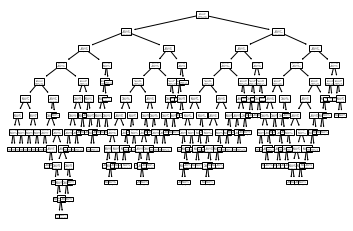

In [41]:
tree.plot_tree(model)

### Question 6. Now try using max_depth = 2, 3, 4 and crierion = 'gini' and 'entropy' to build 3 X 2 = 6 different models

Type your answer and code here

In [46]:
depths=[2,3,4]
criterias=['gini','entropy']
for d in depths:
    for c in criterias:
        model = DecisionTreeClassifier(max_depth=d, criterion=c)
        model.fit(X_train,Y_train)
        predictions = model.predict(X_test)
        print('---------------------------------')
        print('depth: '+str(d) + '\t' + 'criterion' + c +'\n')
        print(confusion_matrix(Y_test,predictions))
        print(classification_report(Y_test,predictions))
        print(accuracy_score(Y_test, predictions))
        #tree.plot_tree(model)

---------------------------------
depth: 2	criteriongini

[[730 135]
 [240 169]]
              precision    recall  f1-score   support

           0       0.75      0.84      0.80       865
           1       0.56      0.41      0.47       409

    accuracy                           0.71      1274
   macro avg       0.65      0.63      0.63      1274
weighted avg       0.69      0.71      0.69      1274

0.7056514913657771
---------------------------------
depth: 2	criterionentropy

[[730 135]
 [240 169]]
              precision    recall  f1-score   support

           0       0.75      0.84      0.80       865
           1       0.56      0.41      0.47       409

    accuracy                           0.71      1274
   macro avg       0.65      0.63      0.63      1274
weighted avg       0.69      0.71      0.69      1274

0.7056514913657771
---------------------------------
depth: 3	criteriongini

[[731 134]
 [242 167]]
              precision    recall  f1-score   support

       

### Question 7. What is your obsevation from Question 6? Does the choice of the criterion important in this case? What about the max_depth? What is the best choice of max_depth and criterion?

Type your answer and code here

### Question 8, now pick three models, with max_depth = 2, 3 and 4. You can pick the which ever criterions you want and visual the three trees

Type your answer and code here

[Text(167.4, 195.696, 'X[0] <= 3.5\ngini = 0.437\nsamples = 5092\nvalue = [3448, 1644]'),
 Text(83.7, 152.208, 'X[0] <= 2.5\ngini = 0.483\nsamples = 1136\nvalue = [463, 673]'),
 Text(41.85, 108.72, 'X[5] <= 0.5\ngini = 0.445\nsamples = 350\nvalue = [117, 233]'),
 Text(20.925, 65.232, 'X[2] <= 0.5\ngini = 0.457\nsamples = 311\nvalue = [110, 201]'),
 Text(10.4625, 21.744, 'gini = 0.444\nsamples = 252\nvalue = [84, 168]'),
 Text(31.387500000000003, 21.744, 'gini = 0.493\nsamples = 59\nvalue = [26, 33]'),
 Text(62.775000000000006, 65.232, 'X[1] <= 18.5\ngini = 0.295\nsamples = 39\nvalue = [7, 32]'),
 Text(52.3125, 21.744, 'gini = 0.266\nsamples = 38\nvalue = [6, 32]'),
 Text(73.2375, 21.744, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(125.55000000000001, 108.72, 'X[6] <= 0.5\ngini = 0.493\nsamples = 786\nvalue = [346, 440]'),
 Text(104.625, 65.232, 'X[2] <= 0.5\ngini = 0.492\nsamples = 770\nvalue = [335, 435]'),
 Text(94.16250000000001, 21.744, 'gini = 0.488\nsamples = 661\nvalue = [

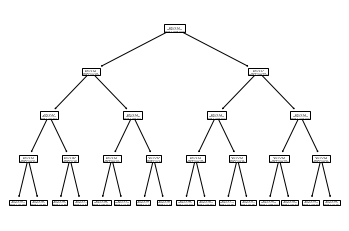

In [48]:
# Hint 
model1 = DecisionTreeClassifier(max_depth=2, criterion='gini')
model1.fit(X_train, Y_train)
model2 = DecisionTreeClassifier(max_depth=3, criterion='gini')
model2.fit(X_train, Y_train)
model3 = DecisionTreeClassifier(max_depth=4, criterion='gini')
model3.fit(X_train, Y_train)
tree.plot_tree(model1)

[Text(167.4, 190.26, 'X[0] <= 3.5\ngini = 0.437\nsamples = 5092\nvalue = [3448, 1644]'),
 Text(83.7, 135.9, 'X[0] <= 2.5\ngini = 0.483\nsamples = 1136\nvalue = [463, 673]'),
 Text(41.85, 81.53999999999999, 'X[5] <= 0.5\ngini = 0.445\nsamples = 350\nvalue = [117, 233]'),
 Text(20.925, 27.180000000000007, 'gini = 0.457\nsamples = 311\nvalue = [110, 201]'),
 Text(62.775000000000006, 27.180000000000007, 'gini = 0.295\nsamples = 39\nvalue = [7, 32]'),
 Text(125.55000000000001, 81.53999999999999, 'X[6] <= 0.5\ngini = 0.493\nsamples = 786\nvalue = [346, 440]'),
 Text(104.625, 27.180000000000007, 'gini = 0.492\nsamples = 770\nvalue = [335, 435]'),
 Text(146.475, 27.180000000000007, 'gini = 0.43\nsamples = 16\nvalue = [11, 5]'),
 Text(251.10000000000002, 135.9, 'X[0] <= 4.5\ngini = 0.37\nsamples = 3956\nvalue = [2985, 971]'),
 Text(209.25, 81.53999999999999, 'X[5] <= 0.5\ngini = 0.438\nsamples = 1795\nvalue = [1213, 582]'),
 Text(188.32500000000002, 27.180000000000007, 'gini = 0.425\nsamples = 

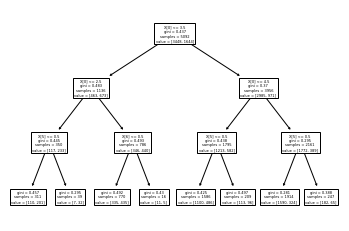

In [49]:
tree.plot_tree(model2)

[Text(167.4, 195.696, 'X[0] <= 3.5\ngini = 0.437\nsamples = 5092\nvalue = [3448, 1644]'),
 Text(83.7, 152.208, 'X[0] <= 2.5\ngini = 0.483\nsamples = 1136\nvalue = [463, 673]'),
 Text(41.85, 108.72, 'X[5] <= 0.5\ngini = 0.445\nsamples = 350\nvalue = [117, 233]'),
 Text(20.925, 65.232, 'X[2] <= 0.5\ngini = 0.457\nsamples = 311\nvalue = [110, 201]'),
 Text(10.4625, 21.744, 'gini = 0.444\nsamples = 252\nvalue = [84, 168]'),
 Text(31.387500000000003, 21.744, 'gini = 0.493\nsamples = 59\nvalue = [26, 33]'),
 Text(62.775000000000006, 65.232, 'X[1] <= 18.5\ngini = 0.295\nsamples = 39\nvalue = [7, 32]'),
 Text(52.3125, 21.744, 'gini = 0.266\nsamples = 38\nvalue = [6, 32]'),
 Text(73.2375, 21.744, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(125.55000000000001, 108.72, 'X[6] <= 0.5\ngini = 0.493\nsamples = 786\nvalue = [346, 440]'),
 Text(104.625, 65.232, 'X[2] <= 0.5\ngini = 0.492\nsamples = 770\nvalue = [335, 435]'),
 Text(94.16250000000001, 21.744, 'gini = 0.488\nsamples = 661\nvalue = [

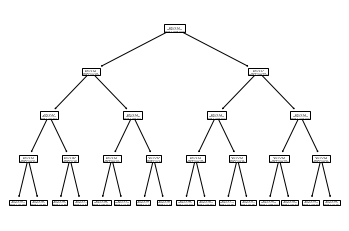

In [50]:
tree.plot_tree(model3)

### Question 9. Now build a Random Forest Classifier with, say, 100 trees. Check the model performance 

Type your answer and code here

In [53]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, Y_train)
rfc_pred = rfc.predict(X_test)
print(classification_report(Y_test, rfc_pred))
print(accuracy_score(Y_test, rfc_pred))

              precision    recall  f1-score   support

           0       0.74      0.86      0.79       865
           1       0.55      0.36      0.44       409

    accuracy                           0.70      1274
   macro avg       0.64      0.61      0.62      1274
weighted avg       0.68      0.70      0.68      1274

0.6993720565149136
